# ALUNA: RAÍSSA HEIMANN
## **O que deve ser feito:**

1. Escolher uma das colunas dos dados utilizados no projeto 1 para
predição (classificação ou regressão)
2. Separar os dados em treinamento, validação e teste
3. Selecionar 4 algoritmos de acordo com a tarefa escolhida no
passo 1
4. Adicionar MLFlow no treinamento dos modelos para
rastreamento
5. Executar uma ferramenta de seleção de hiper-parâmetros sobre o
conjunto de validação
  1. Selecionar poucos hiper-parâmetros por algoritmo (max. 3)
  2. Selecionar o modelo (algoritmo+valores de hiper-parâmetros) com
melhor resultado na métrica de avaliação
  3. Executar o melhor modelo de cada algoritmo no conjunto de teste e
selecionar o melhor modelo geral na métrica de avaliação
6. Realizar diagnóstico do melhor modelo geral da etapa 5 e
melhorá-lo a partir do diagnóstico

• Bônus: Utilizar auto-sklearn, clustering para entendimento dos
dados

### Importar as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pylab as plt    #cria gráficos
import seaborn as sns             #biblioteca que cria gráficos com quaisquer mapas de cores da biblioteca matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

### Importando o dataset novamente

Obtido em: https://allisonhorst.github.io/palmerpenguins/

Os dados foram coletados e disponibilizados pela Dra. Kristen Gorman e pela Estação Palmer, Antarctica LTER , membro da Long Term Ecological Research Network.

O conjunto de dados contêm dados de 344 pinguins. Existem 3 espécies diferentes de pinguins neste conjunto de dados, coletados em 3 ilhas do Arquipélago Palmer, na Antártica.

In [2]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins_raw.csv'
df = pd.read_csv(url)

Aplicando algumas limpezas básicas e necessárias para darmos andamento ao projeto 2

In [3]:
df = df.drop('Comments', axis=1)

In [4]:
df.shape
print("Número de linhas:", df.shape[0])
print("Número de colunas:", df.shape[1])

Número de linhas: 344
Número de colunas: 16


In [5]:
df['studyName'] = df['studyName'].astype('category')
df['Species'] = df['Species'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Island'] = df['Island'].astype('category')
df['Stage'] = df['Stage'].astype('category')
df['Individual ID'] = df['Individual ID'].astype('category')
df['Clutch Completion'] = df['Clutch Completion'].astype('category')
df['Date Egg'] = df['Date Egg'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [6]:
counts = df['Species'].value_counts()
print(counts)

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


In [7]:
print(df.isnull().sum())

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


Valores ausentes:

In [8]:
threshold = 0.4

num_faltantes = df.isnull().mean(axis=1)
linhas_faltantes = (num_faltantes > threshold).sum()

print(f"Número de linhas com mais de 40% de valores ausentes: {linhas_faltantes}")

Número de linhas com mais de 40% de valores ausentes: 2


In [9]:
df = df.loc[num_faltantes <= threshold]

In [10]:
df.isnull().sum()

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     9
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

In [11]:
df = df.dropna(subset=['Sex'])

In [12]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   studyName            333 non-null    category
 1   Sample Number        333 non-null    int64   
 2   Species              333 non-null    category
 3   Region               333 non-null    category
 4   Island               333 non-null    category
 5   Stage                333 non-null    category
 6   Individual ID        333 non-null    category
 7   Clutch Completion    333 non-null    category
 8   Date Egg             333 non-null    category
 9   Culmen Length (mm)   333 non-null    float64 
 10  Culmen Depth (mm)    333 non-null    float64 
 11  Flipper Length (mm)  333 non-null    float64 
 12  Body Mass (g)        333 non-null    float64 
 13  Sex                  333 non-null    category
 14  Delta 15 N (o/oo)    324 non-null    float64 
 15  Delta 13 C (o/oo)    325 non

In [14]:
nan_columns = df.columns[df.isna().any()].tolist()

print("Colnas com valores ausentes:", nan_columns)

Colnas com valores ausentes: ['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']


In [15]:
df.dropna(subset=['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], inplace=True)

## Primeira etapa: CLASSIFICAÇÃO
1. Escolher uma das colunas dos dados utilizados no projeto 1 para
predição (classificação ou regressão)

Escolhemos 'Flipper Length (mm)'

In [16]:
print(df['Flipper Length (mm)'].describe())

count    324.000000
mean     201.216049
std       13.958683
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: Flipper Length (mm), dtype: float64


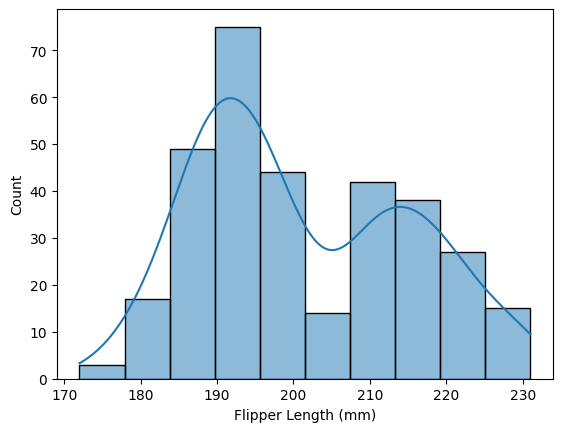

In [17]:
sns.histplot(df['Flipper Length (mm)'], kde=True)
plt.show()

Definindo os limites para curto, médio e grande baseado na distribuição e verificando o mapeamento

In [18]:
bins = [df['Flipper Length (mm)'].min(), 190, 210, df['Flipper Length (mm)'].max()]
labels = ['curto', 'médio', 'grande']
df['Classe - Flipper Length'] = pd.cut(df['Flipper Length (mm)'], bins=bins, labels=labels)

print(df[['Flipper Length (mm)', 'Classe - Flipper Length']].head())

   Flipper Length (mm) Classe - Flipper Length
1                186.0                   curto
2                195.0                   médio
4                193.0                   médio
5                190.0                   curto
6                181.0                   curto


Calculando quanto tem em cada uma das classes

In [19]:
classe_contagem = df['Classe - Flipper Length'].value_counts()

print("Contagem de observações por categoria:")
print(classe_contagem)

Contagem de observações por categoria:
Classe - Flipper Length
médio     139
grande     95
curto      89
Name: count, dtype: int64


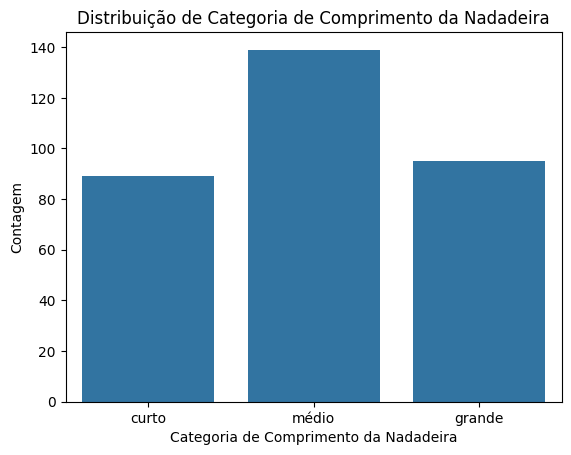

In [20]:
sns.countplot(x=df['Classe - Flipper Length'])
plt.title('Distribuição de Categoria de Comprimento da Nadadeira')
plt.xlabel('Categoria de Comprimento da Nadadeira')
plt.ylabel('Contagem')
plt.show()

In [21]:
flipper_length_mapping = {
    "curto": 1,
    "médio": 2,
    "grande": 3
}

df['Classe - Flipper Length'] = df['Classe - Flipper Length'].map(flipper_length_mapping)

print(df[['Flipper Length (mm)', 'Classe - Flipper Length']])

     Flipper Length (mm) Classe - Flipper Length
1                  186.0                       1
2                  195.0                       2
4                  193.0                       2
5                  190.0                       1
6                  181.0                       1
..                   ...                     ...
339                207.0                       2
340                202.0                       2
341                193.0                       2
342                210.0                       2
343                198.0                       2

[324 rows x 2 columns]


## BÔNUS: Antes de dividirmos em treinamento, validação e teste, vamos fazer a clusterização

In [22]:
df['Body Mass/Flipper Length'] = df['Body Mass (g)'] / df['Flipper Length (mm)']

In [23]:
X = df[['Classe - Flipper Length', 'Body Mass (g)', 'Body Mass/Flipper Length']].dropna()
y = df.loc[X.index, 'Species']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

PCA para reduzir a dimensionalidade dos dados

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


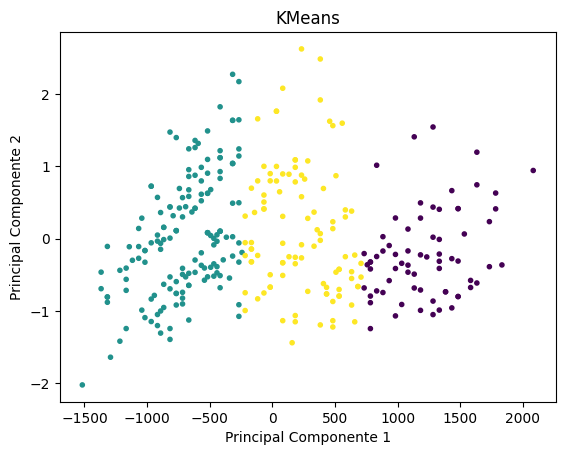

In [26]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')
plt.title("KMeans")
plt.xlabel("Principal Componente 1")
plt.ylabel("Principal Componente 2")
plt.show()

In [27]:
df_clusters = pd.DataFrame(X, columns=['Classe - Flipper Length', 'Body Mass (g)', 'Body Mass/Flipper Length'])
df_clusters['Cluster'] = clusters
df_clusters['Species'] = y

## Segunda etapa:


2. Separar os dados em treinamento, validação e teste

Coluna target: 'species' e vamos usar apenas 'Flipper Length' no X

In [28]:
X = df[['Classe - Flipper Length', 'Body Mass (g)']]

In [29]:
X = X.dropna()
y = df.loc[X.index, 'Species']

In [30]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [33]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    print(f"Accuracy of {model_name}: {accuracy:.4f}")
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return accuracy, report

In [34]:
results = {}

## Terceira etapa:

Selecionar 4 algoritmos de acordo com a tarefa escolhida no passo 1(classificação) e os algoritmos escolhidos foram: MLP, KNN, Árvore de Decisão e Random Forest

Accuracy of MLP Classifier: 0.7500


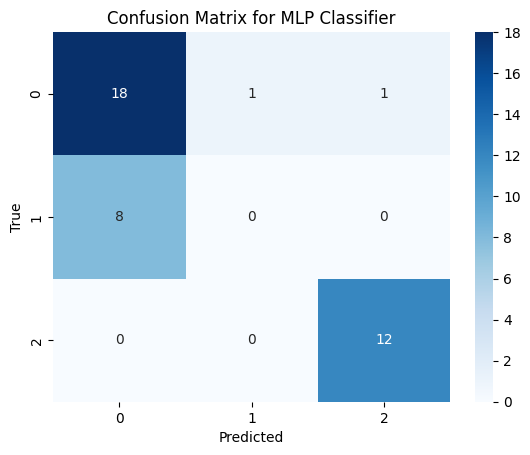

In [35]:
mlp = MLPClassifier(random_state=42, max_iter=300)
accuracy, report = train_and_evaluate(mlp, X_train_scaled, y_train, X_val_scaled, y_val, "MLP Classifier")
results['MLP'] = {'Accuracy': accuracy, 'Precision': report['weighted avg']['precision'],
                  'Recall': report['weighted avg']['recall'], 'F1-Score': report['weighted avg']['f1-score']}

Accuracy of KNN Classifier: 0.7250


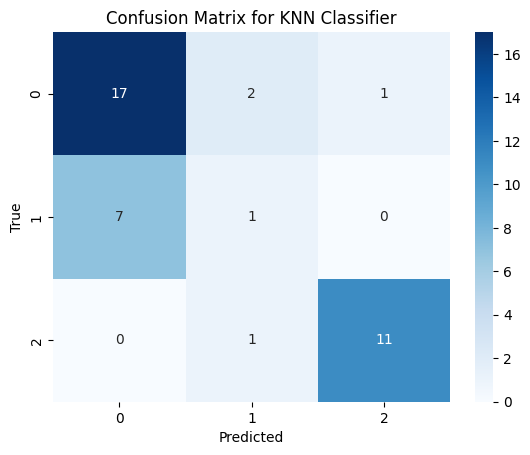

In [36]:
knn = KNeighborsClassifier()
accuracy, report = train_and_evaluate(knn, X_train_scaled, y_train, X_val_scaled, y_val, "KNN Classifier")
results['KNN'] = {'Accuracy': accuracy, 'Precision': report['weighted avg']['precision'],
                  'Recall': report['weighted avg']['recall'], 'F1-Score': report['weighted avg']['f1-score']}

Accuracy of Decision Tree Classifier: 0.6750


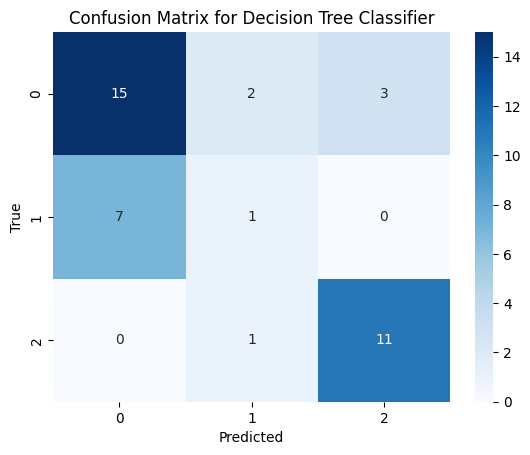

In [37]:
dt = DecisionTreeClassifier(random_state=42)
accuracy, report = train_and_evaluate(dt, X_train_scaled, y_train, X_val_scaled, y_val, "Decision Tree Classifier")
results['Decision Tree'] = {'Accuracy': accuracy, 'Precision': report['weighted avg']['precision'],
                            'Recall': report['weighted avg']['recall'], 'F1-Score': report['weighted avg']['f1-score']}

Accuracy of Random Forest Classifier: 0.6500


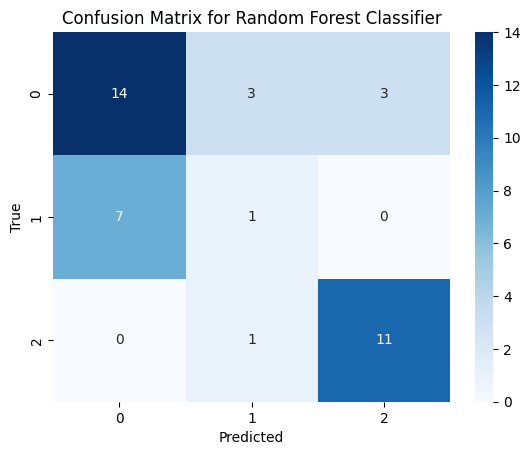

In [38]:
rf = RandomForestClassifier(random_state=42)
accuracy, report = train_and_evaluate(rf, X_train_scaled, y_train, X_val_scaled, y_val, "Random Forest Classifier")
results['Random Forest'] = {'Accuracy': accuracy, 'Precision': report['weighted avg']['precision'],
                            'Recall': report['weighted avg']['recall'], 'F1-Score': report['weighted avg']['f1-score']}

In [39]:
results_df = pd.DataFrame(results).T
print(results_df)

               Accuracy  Precision  Recall  F1-Score
MLP               0.750   0.623077   0.750  0.679304
KNN               0.725   0.679167   0.725  0.694697
Decision Tree     0.675   0.626623   0.675  0.644322
Random Forest     0.650   0.609048   0.650  0.626079


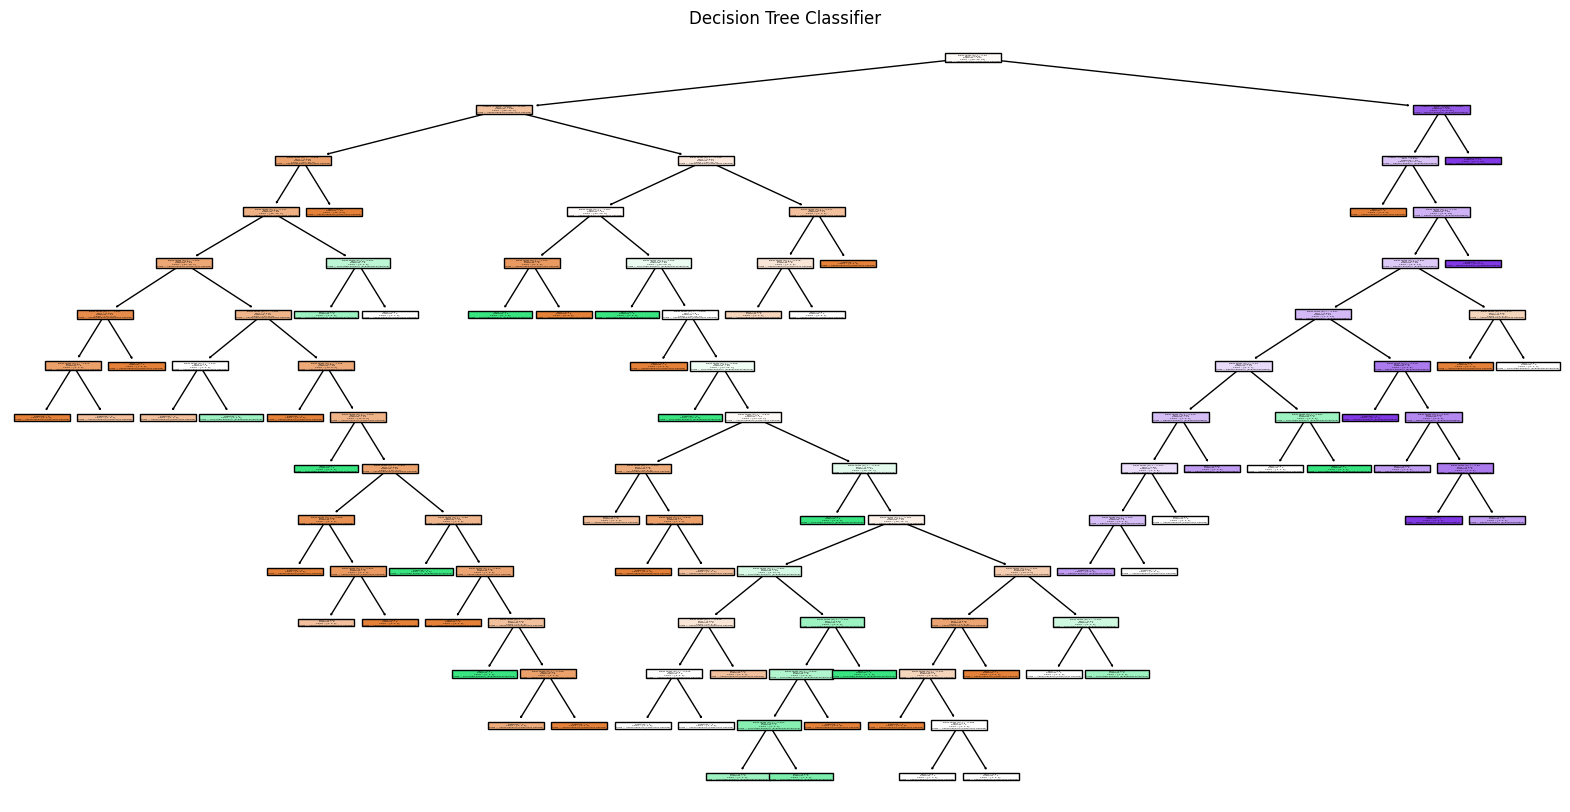

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=['Classe - Flipper Length', 'Body Mass (g)'], class_names=encoder.classes_, filled=True)
plt.title("Decision Tree Classifier")
plt.show()


A árvore de decisão está bastante complexa devido à quantidade de divisões realizadas para tentar classificar os dados com alta precisão. Isso pode indicar que a árvore está overfitting, ou seja, está aprendendo muito bem os detalhes e ruídos do conjunto de treinamento, mas pode não generalizar bem para novos dados.

Para resolver isso, podemos podar a árvore de decisão. Isso pode ser feito definindo alguns parâmetros como max_depth, min_samples_split, e min_samples_leaf para limitar a profundidade da árvore e o número de amostras necessárias para fazer uma divisão. Vou ajustar o código para incluir esses parâmetros e reduzir a complexidade da árvore.

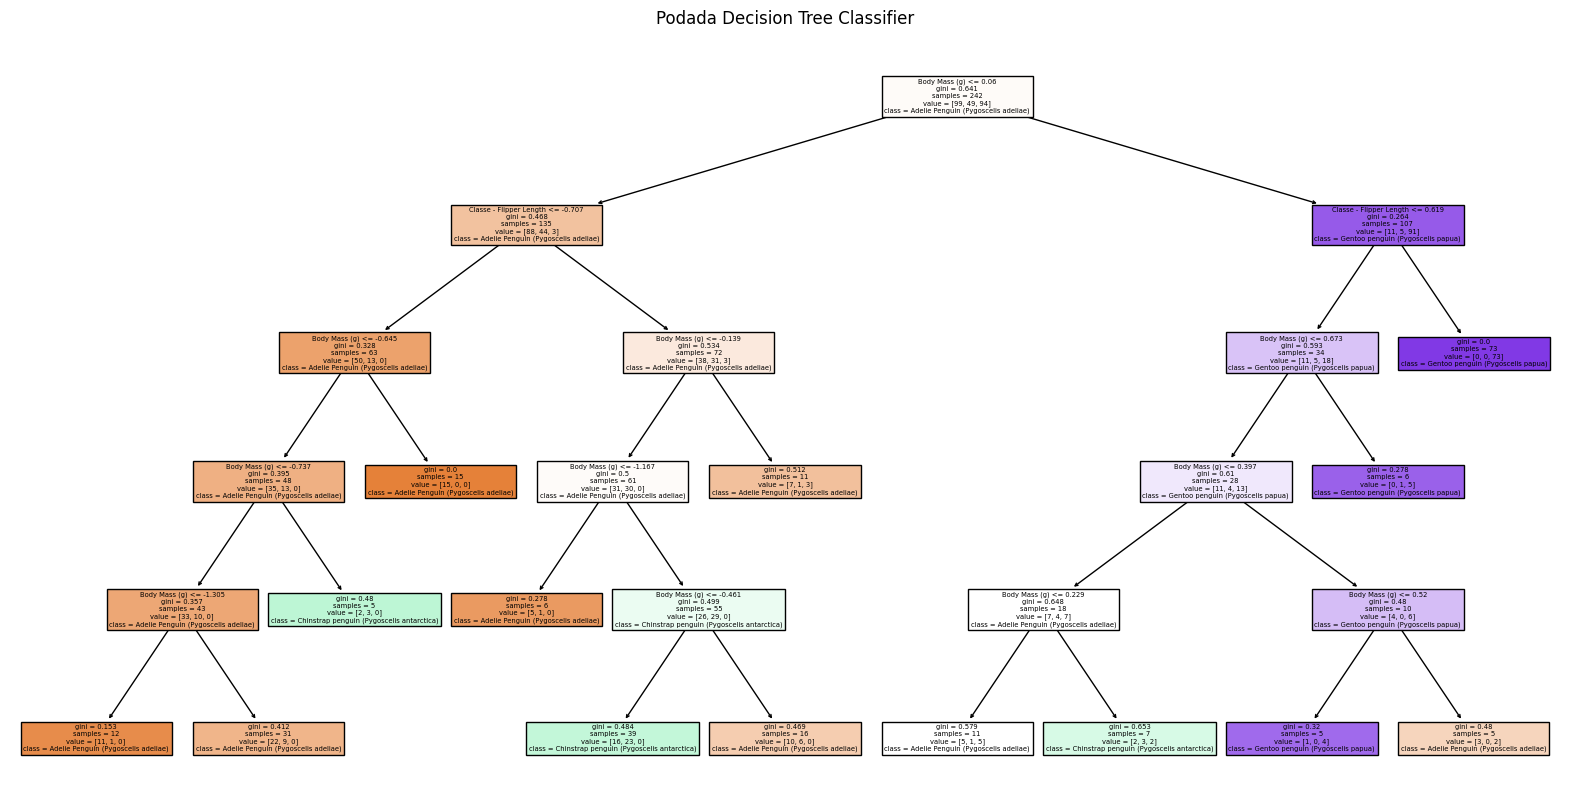

In [ ]:
# Podando
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=['Classe - Flipper Length', 'Body Mass (g)'], class_names=encoder.classes_, filled=True)
plt.title("Podada Decision Tree Classifier")
plt.show()

## Quarta etapa:
4. Adicionar MLFlow no treinamento dos modelos para rastreamento

In [ ]:
!pip install -q mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import mlflow
import mlflow.sklearn
import logging
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from urllib.parse import urlparse

In [ ]:
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    ac = accuracy_score(y_test, pred)
    ps = precision_score(y_test, pred, average='macro')
    rc = recall_score(y_test, pred, average='macro')
    return rmse, mae, r2, ac, ps, rc

Essa função será chamada para registrar o novo modelo treinado no MLFlow

In [ ]:
def save_model_in_mlflow(model, y_pred, model_name):
  with mlflow.start_run():
    (rmse, mae, r2, ac, ps, rc) = eval_metrics(y_test, y_pred)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("acc", ac)
    mlflow.log_metric("precision", ps)
    mlflow.log_metric("recall", rc)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    mlflow.sklearn.log_model(model, "model", registered_model_name=model_name)

Para visualizar o MLFlow

In [ ]:
!pip install -q pyngrok

In [ ]:
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = "2gekSDgtME86uy3zZrLfLku5a5L_7pgaLWcTj2in6VWmR7tjH"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://cdf5-35-231-255-149.ngrok-free.app


In [60]:
!mlflow ui

[2024-07-12 06:35:36 +0000] [5728] [INFO] Starting gunicorn 22.0.0
[2024-07-12 06:35:36 +0000] [5728] [INFO] Listening at: http://127.0.0.1:5000 (5728)
[2024-07-12 06:35:36 +0000] [5728] [INFO] Using worker: sync
[2024-07-12 06:35:36 +0000] [5729] [INFO] Booting worker with pid: 5729
[2024-07-12 06:35:36 +0000] [5730] [INFO] Booting worker with pid: 5730
[2024-07-12 06:35:37 +0000] [5731] [INFO] Booting worker with pid: 5731
[2024-07-12 06:35:37 +0000] [5732] [INFO] Booting worker with pid: 5732

[2024-07-12 06:39:36 +0000] [5728] [INFO] Handling signal: int
Aborted!
[2024-07-12 06:39:36 +0000] [5730] [INFO] Worker exiting (pid: 5730)
[2024-07-12 06:39:36 +0000] [5729] [INFO] Worker exiting (pid: 5729)
[2024-07-12 06:39:36 +0000] [5731] [INFO] Worker exiting (pid: 5731)
[2024-07-12 06:39:36 +0000] [5732] [INFO] Worker exiting (pid: 5732)
[2024-07-12 06:39:37 +0000] [5728] [INFO] Shutting down: Master


## Quinta etapa:

5. Executar uma ferramenta de seleção de hiper-parâmetros sobre o conjunto de validação:
    1. Selecionar poucos hiper-parâmetros por algoritmo (max. 3)
    2. Selecionar o modelo (algoritmo+valores de hiper-parâmetros) com melhor resultado na métrica de avaliação
    3. Executar o melhor modelo de cada algoritmo no conjunto de teste e selecionar o melhor modelo geral na métrica de avaliação

Existem várias ferramentas para escolha de hiper-parâmetros, como grid search e optuna.

Aqui segue a função para realizar Grid Search:

In [71]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(model, param_grid, X_train, y_train, X_val, y_val, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Melhores arâmetros para {model_name}: {best_params}")
    print(f"Acurácia para {model_name} com os melhores parâmetros: {accuracy:.4f}")
    print()
    return best_model, best_params, accuracy

Definimos os hiper-parâmetros para os 4 algoritmos e aplicamos o GridSearch

In [72]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

best_rf_model, best_rf_params, best_rf_accuracy = perform_grid_search(RandomForestClassifier(random_state=42), param_grid_rf, X_train_scaled, y_train, X_val_scaled, y_val, "Random Forest")

param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_dt_model, best_dt_params, best_dt_accuracy = perform_grid_search(DecisionTreeClassifier(random_state=42), param_grid_dt, X_train_scaled, y_train, X_val_scaled, y_val, "Decision Tree")

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
best_knn_model, best_knn_params, best_knn_accuracy = perform_grid_search(KNeighborsClassifier(), param_grid_knn, X_train_scaled, y_train, X_val_scaled, y_val, "KNN")

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}
best_mlp_model, best_mlp_params, best_mlp_accuracy = perform_grid_search(MLPClassifier(random_state=42, max_iter=300), param_grid_mlp, X_train_scaled, y_train, X_val_scaled, y_val, "MLP")

Melhores arâmetros para Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Acurácia para Random Forest com os melhores parâmetros: 0.6500

Melhores arâmetros para Decision Tree: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Acurácia para Decision Tree com os melhores parâmetros: 0.6750

Melhores arâmetros para KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Acurácia para KNN com os melhores parâmetros: 0.7500

Melhores arâmetros para MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'sgd'}
Acurácia para MLP com os melhores parâmetros: 0.7750



In [74]:
best_models = {
    'Random Forest': best_rf_model,
    'Decision Tree': best_dt_model,
    'KNN': best_knn_model,
    'MLP': best_mlp_model
}
best_accuracies = {
    'Random Forest': best_rf_accuracy,
    'Decision Tree': best_dt_accuracy,
    'KNN': best_knn_accuracy,
    'MLP': best_mlp_accuracy
}
print("Os modelos e suas acurácias:")
print(best_accuracies)

best_model_name = max(best_accuracies, key=best_accuracies.get)
best_model = best_models[best_model_name]
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

Os modelos e suas acurácias:
{'Random Forest': 0.65, 'Decision Tree': 0.675, 'KNN': 0.75, 'MLP': 0.775}


O melhor modelo, com base nos resultados de acurácia de validação, é o MLP (Multi-Layer Perceptron), com uma acurácia de 0.775.

## Sexta etapa:

6. Realizar diagnóstico do melhor modelo geral da etapa 5(foi MLP) e
melhorá-lo a partir do diagnóstico

Test Accuracy of the best model (MLP): 0.6341
Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.42      0.50      0.45        10
           2       0.77      0.83      0.80        12

    accuracy                           0.63        41
   macro avg       0.62      0.64      0.63        41
weighted avg       0.65      0.63      0.64        41



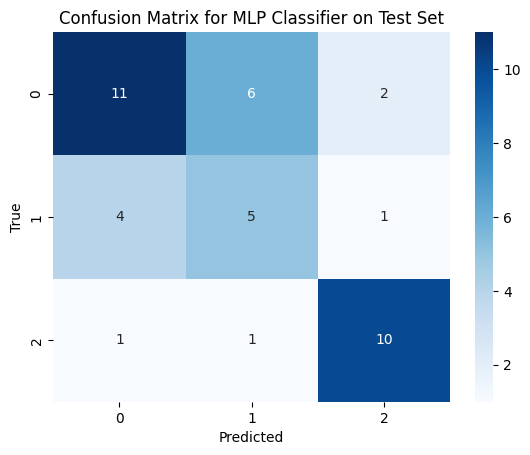

In [79]:
best_model = best_mlp_model
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy of the best model (MLP): {test_accuracy:.4f}")
print(f"Test Classification Report:\n{test_report}")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for MLP Classifier on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'sgd'}
Validation Accuracy for MLP with best params: 0.7750
Test Accuracy of the improved MLP: 0.6585
Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        19
           1       0.00      0.00      0.00        10
           2       0.77      0.83      0.80        12

    accuracy                           0.66        41
   macro avg       0.46      0.58      0.51        41
weighted avg       0.51      0.66      0.57        41



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


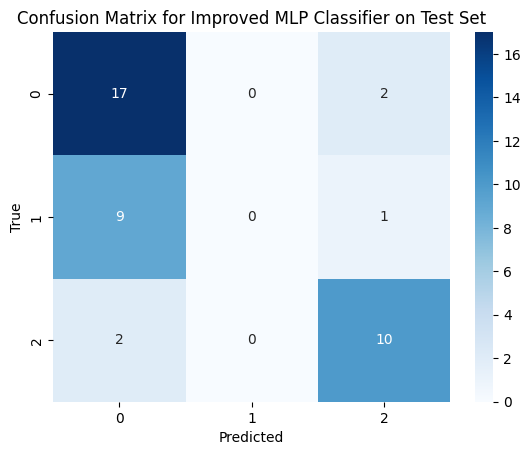

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42, max_iter=300), param_grid_mlp, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train_scaled, y_train)

best_mlp_model = grid_search_mlp.best_estimator_
best_mlp_params = grid_search_mlp.best_params_

print(f"Best parameters for MLP: {best_mlp_params}")

y_val_pred = best_mlp_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy for MLP with best params: {val_accuracy:.4f}")

y_test_pred = best_mlp_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy of the improved MLP: {test_accuracy:.4f}")
print(f"Test Classification Report:\n{test_report}")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Improved MLP Classifier on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Com base nos resultados, a acurácia no conjunto de validação foi de 0.775, enquanto a acurácia no conjunto de teste foi de 0.6585. Isso indica uma discrepância entre a performance nos dois conjuntos, sugerindo que o modelo pode estar overfitting no conjunto de validação ou que há uma diferença significativa na distribuição dos dados entre os conjuntos de treino/validação e teste.

Análise dos Resultados
1. Acurácia:

*   Validação: 0.775
*   Teste: 0.6585

2. Relatório de Classificação:

A classe 1 (no suporte de 10) tem uma precisão, recall e f1-score de 0.00, indicando que o modelo não conseguiu prever corretamente essa classe no conjunto de teste.

Verificação e Balanceamento das Classes:

Distribuição das classes no conjunto de treino:
0    99
2    94
1    49
Name: count, dtype: int64
Distribuição das classes após balanceamento:
2    99
0    99
1    99
Name: count, dtype: int64
Best parameters for MLP after balancing: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}
Validation Accuracy for MLP with balanced data and best params: 0.8250
Test Accuracy of the improved MLP with balanced data: 0.6341
Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.42      0.50      0.45        10
           2       0.77      0.83      0.80        12

    accuracy                           0.63        41
   macro avg       0.62      0.64      0.63        41
weighted avg       0.65      0.63      0.64        41



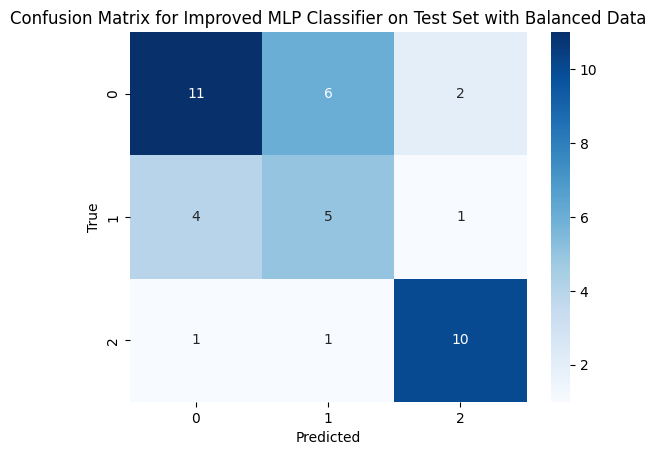

In [81]:
print("Distribuição das classes no conjunto de treino:")
print(pd.Series(y_train).value_counts())

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Distribuição das classes após balanceamento:")
print(pd.Series(y_train_balanced).value_counts())

grid_search_mlp.fit(X_train_balanced, y_train_balanced)
best_mlp_model = grid_search_mlp.best_estimator_
best_mlp_params = grid_search_mlp.best_params_

print(f"Best parameters for MLP after balancing: {best_mlp_params}")

y_val_pred = best_mlp_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy for MLP with balanced data and best params: {val_accuracy:.4f}")

y_test_pred = best_mlp_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy of the improved MLP with balanced data: {test_accuracy:.4f}")
print(f"Test Classification Report:\n{test_report}")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Improved MLP Classifier on Test Set with Balanced Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Os resultados após o balanceamento das classes mostram uma melhora na acurácia de validação (0.8250), mas a acurácia no conjunto de teste (0.6341) ainda não é ideal. Isso pode indicar que o modelo ainda está overfitting no conjunto de validação ou que há uma diferença significativa entre os conjuntos de dados.

Validation Accuracy for Ensemble Model: 0.7250
Test Accuracy of the Ensemble Model: 0.6341
Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.40      0.20      0.27        10
           2       0.77      0.83      0.80        12

    accuracy                           0.63        41
   macro avg       0.59      0.59      0.58        41
weighted avg       0.60      0.63      0.61        41



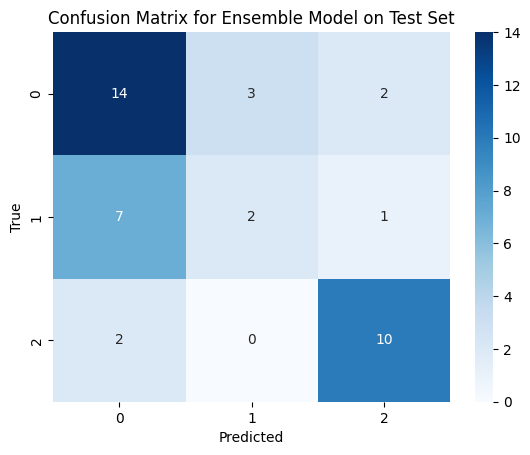

In [82]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('mlp', best_mlp_model),
    ('rf', best_rf_model),
    ('knn', best_knn_model),
    ('dt', best_dt_model)
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)

y_val_pred = ensemble_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy for Ensemble Model: {val_accuracy:.4f}")

y_test_pred = ensemble_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy of the Ensemble Model: {test_accuracy:.4f}")
print(f"Test Classification Report:\n{test_report}")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Ensemble Model on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Os resultados do modelo ensemble mostram uma acurácia de validação de 0.7250 e uma acurácia de teste de 0.6341. A classe 1 ainda tem uma baixa precisão e recall, indicando que o modelo tem dificuldade em prever essa classe corretamente